# Function Fitting

### load data & set functions

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline
    
def disp_Data(x_axis, y_axis, colour_shape='b.', rows=1, columns=1, size=(10, 5)):
    fig, axes = plt.subplots(rows, columns, figsize=size)
    axes.plot(x_axis, y_axis, colour_shape)
    plt.show()

(15,)
(2, 15)
[ 0.06949649  0.11833792  0.12415684  0.21923799  0.21402511  0.2695956
  0.38354837  0.1381195   0.2282138   0.21838991  0.20394061  0.29085711
  0.15276998  0.26760545  0.32473221]


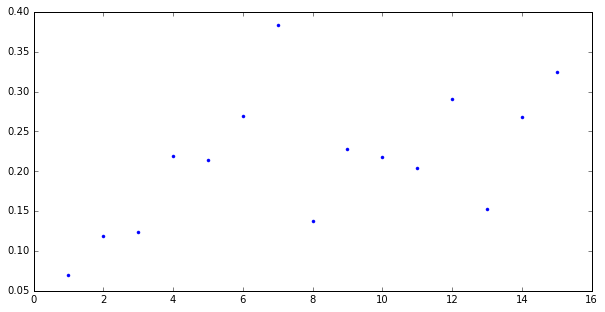

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [2]:
data_path = "../../data/pickles/clusters_test/centroid2.pickle"
train_data = dcp.open_Pickle(data_path)
print(np.shape(train_data[0, :, 0]))
train_data = train_data[:, :, 0]

print(np.shape(train_data)) # centroid of cluster 1
print(train_data[0,:])
attempts = np.arange(15)+1 # attempts
scores = train_data[0,:] # centroid of cluster 1

disp_Data(attempts, scores)

print(attempts)

### exponential fit

#### Two parameters

In [3]:
seed = np.array([1, 1])
exp2_lqe = least_squares(cv.exponential_least2, seed, args=(attempts, scores))
print("Parameters: {0}".format(exp2_lqe.x))

exp2_opt, exp2_cov = curve_fit(cv.exponential_curve2, attempts, scores)
print("Parameters: {0}".format(exp2_opt))

Parameters: [ 0.14980187 -0.04312138]
Parameters: [ 0.14980267 -0.04312082]


(0, 0.43354836943552055)

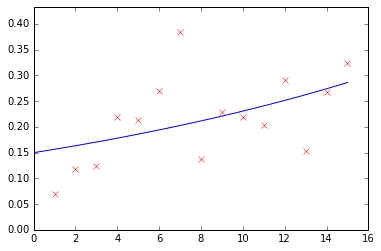

In [4]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.exponential_curve2(x_fit, exp2_opt[0], exp2_opt[1]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

#### Three parameters

In [5]:
seed = np.array([1, 1, 1])
exp3_lqe = least_squares(cv.exponential_least3, seed, args=(attempts, scores))
print("Parameters: {0}".format(exp3_lqe.x))

exp3_opt, exp3_cov = curve_fit(cv.exponential_curve3, attempts, scores)
print("Parameters: {0}".format(exp3_opt))

Parameters: [-0.30827754  0.4626317   0.24977196]
Parameters: [-0.30827811  0.46263319  0.24977189]


(0, 0.43354836943552055)

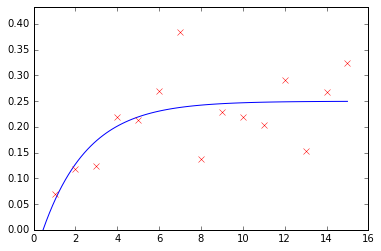

In [6]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.exponential_curve3(x_fit, exp3_opt[0], exp3_opt[1], exp3_opt[2]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

Parameters: [-0.30827811  0.46263319  0.24977189]
(3,)
(2, 100)


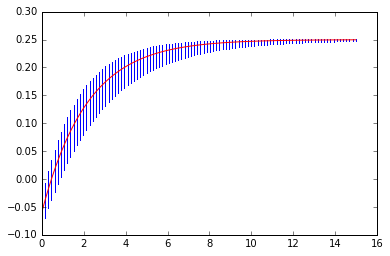

In [10]:
def curve_Fitting(func, x, y, s):
    popt, pcov = curve_fit(func, x, y)
    print("Parameters: {0}".format(exp3_opt))

    upper_bound = []
    lower_bound = []
    for i in range(len(pcov)):
        upper_bound.append(popt[i] + pcov[i,i])
        lower_bound.append(popt[i] - pcov[i,i])

    print(np.shape(upper_bound))

    x_fit = np.linspace(0, 15, 100)
    if len(popt) == 1:
        y_mean = func(x_fit, popt[0])
        y_upper = func(x_fit, upper_bound[0])
        y_lower = func(x_fit, lower_bound[0])        
    
    elif len(popt) == 2:
        y_mean = func(x_fit, popt[0], popt[1])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1])        
    
    elif len(popt) == 3:
        y_mean = func(x_fit, popt[0], popt[1], popt[2])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1], upper_bound[2])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1], lower_bound[2])

    elif len(popt == 4):
        y_mean = func(x_fit, popt[0], popt[1], popt[2], popt[3])
        y_upper = func(x_fit, upper_bound[0], upper_bound[1], upper_bound[2], upper_bound[3])
        y_lower = func(x_fit, lower_bound[0], lower_bound[1], lower_bound[2], upper_bound[3])

    for i in range(len(x_fit)):
        plt.plot([x_fit[i], x_fit[i]], [y_lower[i], y_upper[i]], 'b-')

    plt.plot(x_fit, y_mean, 'r-')
    
    return popt, pcov
        
curve_Fitting(cv.exponential_curve3, attempts, scores, seed)

### polynoimial fit

In [ ]:
seed = np.array([1, 1])
poly_lqe = least_squares(cv.polynomial_least, seed, args=(attempts, scores))
print("Parameters: {0}".format(poly_lqe.x))

poly_opt, poly_cov = curve_fit(cv.polynomial_curve, attempts, scores)
print("Parameters: {0}".format(poly_opt))

In [ ]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.polynomial_curve(x_fit, poly_opt[0], poly_opt[1]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

In [ ]:
upper_bound = []
lower_bound = []
for i in range(len(poly_cov)):
    upper_bound.append(poly_opt[i] + poly_cov[i,i])
    lower_bound.append(poly_opt[i] - poly_cov[i,i])

print(np.shape(upper_bound))

y_mean = cv.polynomial_curve(x_fit, poly_opt[0], poly_opt[1])
y_upper = cv.polynomial_curve(x_fit, upper_bound[0], upper_bound[1])
y_lower = cv.polynomial_curve(x_fit, lower_bound[0], lower_bound[1])

y_err = np.vstack((y_lower, y_lower))
print(np.shape(y_err))


for i in range(len(x_fit)):
    plt.plot([x_fit[i], x_fit[i]], [y_lower[i], y_upper[i]], 'r-')

plt.errorbar(x_fit, y_mean, yerr=y_upper)

### power law fit

#### Two parameters

In [11]:
seed = np.array([1, 1])
pl2_lqe = least_squares(cv.powerlaw_least2, seed, args=(attempts, scores))
print("Parameters: {0}".format(pl2_lqe.x))

pl2_opt, pl2_cov = curve_fit(cv.powerlaw_curve2, attempts, scores)
print("Parameters: {0}".format(pl2_opt))

Parameters: [-0.11538004 -0.32126806]
Parameters: [-0.11537829 -0.32127514]


(0, 0.43354836943552055)

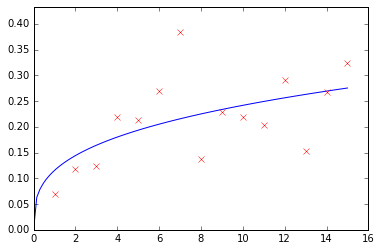

In [12]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.powerlaw_curve2(x_fit, pl2_opt[0], pl2_opt[1]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

#### Thress parameters

In [13]:
curve_Fitting(cv.powerlaw_curve2, attempts, scores, seed)

Parameters: [-0.30827811  0.46263319  0.24977189]
(2,)


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
seed = np.array([1, 1, 1])
pl3_lqe = least_squares(cv.powerlaw_least3, seed, args=(attempts, scores))
print("Parameters: {0}".format(pl3_lqe.x))

pl3_opt, pl3_cov = curve_fit(cv.powerlaw_curve3, attempts, scores)
print("Parameters: {0}".format(pl3_opt))

In [ ]:
x_fit = np.linspace(0, 15, 100)
plt.plot(x_fit, cv.powerlaw_curve3(x_fit, pl3_opt[0], pl3_opt[1], pl3_opt[2]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, max(scores)+0.05])

#### Four parameters

In [ ]:
seed = np.array([1, 1, 1, 1])
pl4_lqe = least_squares(cv.powerlaw_least4, seed, args=(attempts, scores))
print("Parameters: {0}".format(pl4_lqe.x))

pl4_opt, pl4_cov = curve_fit(cv.powerlaw_curve4, attempts, scores, maxfev = 1000000)
print("Parameters: {0}".format(pl4_opt))

In [ ]:
x_fit = np.linspace(0, 15, 100)
pl4_lqe_param = pl4_lqe.x
plt.plot(x_fit, cv.powerlaw_curve4(x_fit, pl4_lqe_param[0], pl4_lqe_param[1], pl4_lqe_param[2], pl4_lqe_param[3]), 'r-')
plt.plot(x_fit, cv.powerlaw_curve4(x_fit, pl4_opt[0], pl4_opt[1], pl4_opt[2], pl4_opt[3]), 'b-')
plt.plot(attempts, scores, 'rx')
plt.ylim([0, 0.4])